# extract images, expmaps, and nxb for sb profile (0.7-1.2 and 0.5-7 keV)

In [3]:
import os
workdir='/stage/headat/yanling/chandra/chandra/data'
os.chdir(workdir)

In [15]:
print(f'make_instmap_weights 0.5-7_6kev.weight "xsztbabs.abs1*xsapec.apec1" paramvals="abs1.nh=0.0162;abs1.redshift=0;apec1.kt=6;apec1.redshift=0.21;apec1.abundanc=0.3" xsect="vern" abund="lodd" emin=0.5 emax=7.0 ewidth=0.05 clobber=yes')

make_instmap_weights 0.5-7_6kev.weight "xsztbabs.abs1*xsapec.apec1" paramvals="abs1.nh=0.0162;abs1.redshift=0;apec1.kt=6;apec1.redshift=0.21;apec1.abundanc=0.3" xsect="vern" abund="lodd" emin=0.5 emax=7.0 ewidth=0.05 clobber=yes


In [34]:
for band in [ '0.5-7', '0.7-1.2']: 
    print(f'merge_obs "@evt2.lst[ccd_id=0:3]" image_bin_230305/{band} bands={band}_6kev.weight binsize=2 psfmerge=expmap psfecf=0.9 clobber=yes')

merge_obs "@evt2.lst[ccd_id=0:3]" image_bin_230305/0.5-7 bands=0.5-7_6kev.weight binsize=2 psfmerge=expmap psfecf=0.9 clobber=yes
merge_obs "@evt2.lst[ccd_id=0:3]" image_bin_230305/0.7-1.2 bands=0.7-1.2_6kev.weight binsize=2 psfmerge=expmap psfecf=0.9 clobber=yes


In [15]:
'''
# the evt file here is for reproject matching, therefore no need to iterate the band. 
# the output is time scaled nxb file regarding to observations, and the nxbrate.txt file which log the scaling.
python nxb.py ./A222.obsid image_bin_230303/0.5-7_merged_evt.fits --dir /stage/headat/yanling/chandra/chandra/data --nxbdir /stage/headat/zhang/share/bgstow_merged/ --reprocess
'''
from IPython import embed
embed()

Python 3.9.2 (default, Feb 28 2021, 17:03:44) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.20.0 -- An enhanced Interactive Python. Type '?' for help.




In [35]:
print(f'python gennxbmap.py /stage/headat/yanling/chandra/chandra/data/image_bin_230305 A222.obsid nxbrate.txt --eventdir /stage/headat/yanling/chandra/chandra/data --emin 500 --emax 7000 --prefix1 0.5-7 --prefix2 band1')


python gennxbmap.py /stage/headat/yanling/chandra/chandra/data/image_bin_230305 A222.obsid nxbrate.txt --eventdir /stage/headat/yanling/chandra/chandra/data --emin 500 --emax 7000 --prefix1 0.5-7 --prefix2 band1


(1468, 1359)


Set MJD-END to 54308.862060 from DATE-END'. [astropy.wcs.wcs]
<ipython-input-28-a81df9eda670>:28: RuntimeWarning: divide by zero encountered in log10
  image_data = np.where(np.isfinite(np.log10(image_data)), image_data, np.nan)


KeyboardInterrupt: 

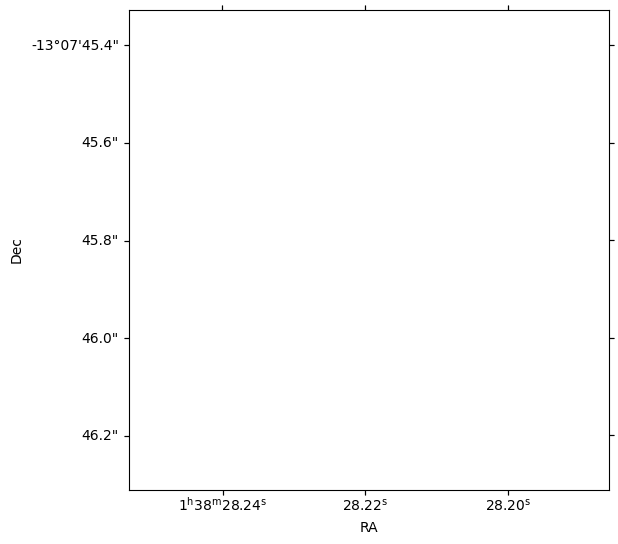

In [28]:
# from astropy.visualization import astropy_mpl_style
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
# plt.style.use(astropy_mpl_style)
plt.style.use('default')
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
kernel = Gaussian2DKernel(x_stddev=20)
# 'EPN_corr_counts'
workdir='/stage/headat/yanling/chandra/chandra/data'

file = f"{workdir}/image_bin_230305/0.7-1.2_band1_thresh.img"
hdu = fits.open(f'{file}')[0]
image_data = hdu.data
print(image_data.shape)
fig = plt.figure(figsize = (6,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=WCS(f'{file}'))
ra = ax.coords[0]
dec = ax.coords[1]
# plt.grid(color='grey', ls='dashed')
plt.grid('off')
ra.set_axislabel('RA')
dec.set_axislabel('Dec')
image_data = np.where(np.isfinite(np.log10(image_data)), image_data, np.nan)
astropy_conv = convolve(image_data, kernel)
plt.imshow(astropy_conv, cmap='gnuplot2', norm = colors.LogNorm(1,2), origin='lower')
plt.colorbar()
# plt.savefig(f'{file}.png')
plt.show()
plt.clf()
